[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/clustering/k_means.ipynb)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

# **Dataset**

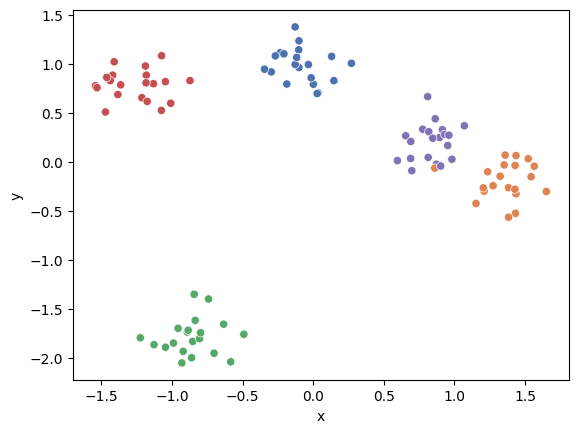

In [4]:
# Create a dataset of 2D distributions

centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# **Library Based Implementation**

# **K - Means Custom Implementation**

In [43]:
class KMeans:

    def __init__(self, n_clusters=8, max_iter=100000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def euclidean(self, point, data):
        """Return euclidean distances between a centroid point & a dataset"""
        return np.sqrt(np.sum((point - data)**2, axis=1))

    def k_means_pp_centroid_initilization(self, X_train):

        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):

            # Calculate distances from points to the centroids
            dists = np.sum([self.euclidean(centroid, X_train) for centroid in centroids], axis=0)

            # Normalize the distances
            dists /= np.sum(dists)

            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            centroids += [X_train[new_centroid_idx]]

        return centroids

    def fit(self, X_train):

        # method 1 to initialize the centroids i.e. randomly
        '''
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        '''

        # method 2 to initialize the centroid i.e. using K means ++
        self.centroids = self.k_means_pp_centroid_initilization(X_train)

        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        prev_centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]


        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:

            # assigning each datapoint to a centroid based on which it is closest to using eucledian distance
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = self.euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous
            prev_centroids = self.centroids

            # calculating new centroids as mean of the points belonging to them
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

            # if any of the new centroid is NAN due to no points then handling that by replacing it with old centroid value
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]

            # updating no of iterations
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = self.euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

In [44]:
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

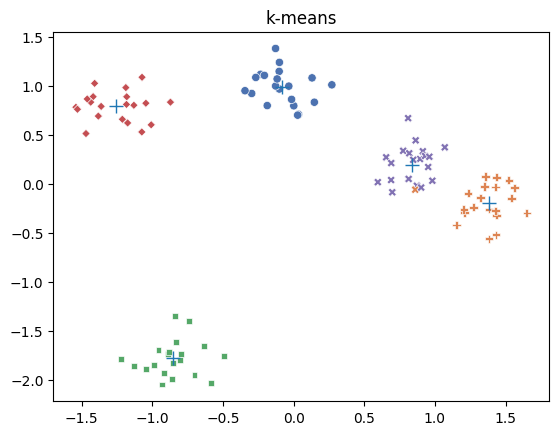

In [45]:
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.title("k-means")
plt.show()